In [2]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
purchase_data=pd.read_csv('/content/drive/MyDrive/Tasks/QUANTIUM/QVI_purchase_behaviour.csv')
txn_data=pd.read_excel('/content/drive/MyDrive/Tasks/QUANTIUM/QVI_transaction_data.xlsx')

In [4]:
df=txn_data.copy()
df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [5]:
df['PROD_NAME'].replace({'Kettle 135g Swt Pot Sea Salt':'Kettle Swt Pot Sea Salt 135g','Sunbites Whlegrn Crisps Frch/Onin 90g':'Sunbites Whlegrn Crisps Frch/Onin 900g','Infuzions Mango Chutny Papadums 70g':'Infuzions Mango Chutny Papadums 700g'},inplace=True)


In [ ]:
df.value_counts()

Kettle Mozzarella   Basil & Pesto 175g      3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g    3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3269
Tyrrells Crisps     Ched & Chives 165g      3268
Cobs Popd Sea Salt  Chips 110g              3265
                                            ... 
RRD Pc Sea Salt     165g                    1431
Woolworths Medium   Salsa 300g              1430
NCC Sour Cream &    Garden Chives 175g      1419
French Fries Potato Chips 175g              1418
WW Crinkle Cut      Original 175g           1410
Name: PROD_NAME, Length: 114, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


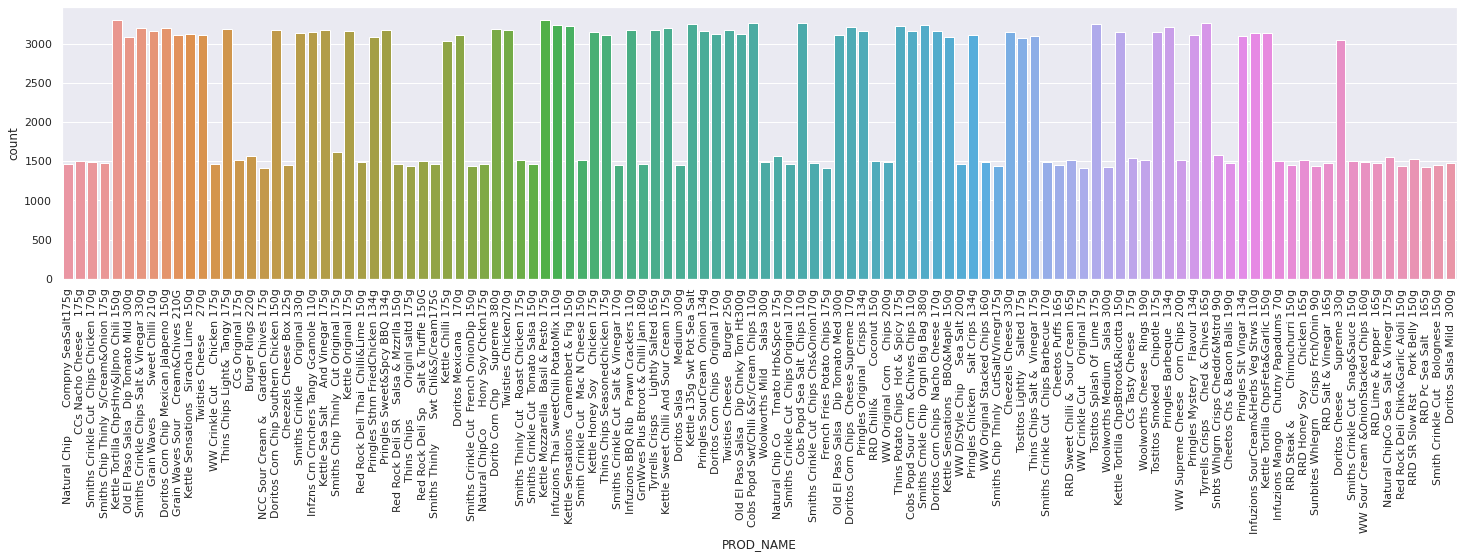

In [ ]:
plt.figure(figsize=(25,5))
sns.countplot(df['PROD_NAME'])
plt.xticks(rotation=90)
plt.show()

In [8]:
txn_data=df.copy()

In [12]:
txn_data.to_csv('/content/drive/MyDrive/Tasks/QUANTIUM/QVI_transaction.csv',index=False)

In [ ]:
data=pd.merge(purchase_data,df)
data

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,1000,YOUNG SINGLES/COUPLES,Premium,43390,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,1002,YOUNG SINGLES/COUPLES,Mainstream,43359,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7
2,1003,YOUNG FAMILIES,Budget,43531,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6
3,1003,YOUNG FAMILIES,Budget,43532,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0
4,1004,OLDER SINGLES/COUPLES,Mainstream,43406,1,5,96,WW Original Stacked Chips 160g,1,1.9
...,...,...,...,...,...,...,...,...,...,...
264831,2370701,YOUNG FAMILIES,Mainstream,43442,88,240378,24,Grain Waves Sweet Chilli 210g,2,7.2
264832,2370751,YOUNG FAMILIES,Premium,43374,88,240394,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2
264833,2370961,OLDER FAMILIES,Budget,43397,88,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4
264834,2370961,OLDER FAMILIES,Budget,43400,88,240481,65,Old El Paso Salsa Dip Chnky Tom Ht300g,2,10.2


In [ ]:
data.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
DATE                0
STORE_NBR           0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
dtype: int64

In [9]:
data1 = txn_data['PROD_NAME']
product_string_pattern = re.compile(r'(?P<PROD_NAME>.*?)\s*(?P<weight>\d+[gG]$)')
data2 = data1.str.extract(product_string_pattern)
data2

,PROD_NAME,weight
0,Natural Chip Compny SeaSalt,175g
1,CCs Nacho Cheese,175g
2,Smiths Crinkle Cut Chips Chicken,170g
3,Smiths Chip Thinly S/Cream&Onion,175g
4,Kettle Tortilla ChpsHny&Jlpno Chili,150g
...,...,...
264831,Kettle Sweet Chilli And Sour Cream,175g
264832,Tostitos Splash Of Lime,175g
264833,Doritos Mexicana,170g
264834,Doritos Corn Chip Mexican Jalapeno,150g


In [10]:
data3 = data2['weight']
weight_string_pattern = re.compile(r'(?P<PROD_WT>\d{2,3})')
data4 = data3.str.extract(weight_string_pattern)
data4

,PROD_WT
0,175
1,175
2,170
3,175
4,150
...,...
264831,175
264832,175
264833,170
264834,150


In [ ]:
data3.value_counts()

175g    64929
150g    41633
134g    25102
110g    22387
170g    19983
165g    15297
300g    15166
330g    12540
380g     6418
270g     6285
200g     4473
135g     3257
250g     3169
210g     3167
210G     3105
90g      3008
190g     2995
160g     2970
220g     1564
70g      1507
150G     1498
180g     1468
175G     1461
125g     1454
Name: weight, dtype: int64

In [ ]:
data4.isna().sum()

PROD_WT    0
dtype: int64

In [11]:
data2=data2.drop('weight',axis=1)
data1=data2.join(data4)
txn_data=txn_data.drop('PROD_NAME',axis=1)
txn_data=txn_data.join(data1)
txn_data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PROD_NAME,PROD_WT
0,43390,1,1000,1,5,2,6.0,Natural Chip Compny SeaSalt,175
1,43599,1,1307,348,66,3,6.3,CCs Nacho Cheese,175
2,43605,1,1343,383,61,2,2.9,Smiths Crinkle Cut Chips Chicken,170
3,43329,2,2373,974,69,5,15.0,Smiths Chip Thinly S/Cream&Onion,175
4,43330,2,2426,1038,108,3,13.8,Kettle Tortilla ChpsHny&Jlpno Chili,150
...,...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,2,10.8,Kettle Sweet Chilli And Sour Cream,175
264832,43325,272,272358,270154,74,1,4.4,Tostitos Splash Of Lime,175
264833,43410,272,272379,270187,51,2,8.8,Doritos Mexicana,170
264834,43461,272,272379,270188,42,2,7.8,Doritos Corn Chip Mexican Jalapeno,150


In [ ]:
data.isna().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
DATE                0
STORE_NBR           0
TXN_ID              0
PROD_NBR            0
PROD_QTY            0
TOT_SALES           0
PROD_NAME           0
PROD_WT             0
dtype: int64

In [ ]:
cols=['LYLTY_CARD_NBR','LIFESTAGE','PREMIUM_CUSTOMER','DATE','STORE_NBR','TXN_ID','PROD_NBR','PROD_NAME','PROD_WT','PROD_QTY','TOT_SALES']
data=data[cols]
data

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_WT,PROD_QTY,TOT_SALES
0,1000,YOUNG SINGLES/COUPLES,Premium,43390,1,1,5,Natural Chip Compny SeaSalt,175,2,6.0
1,1002,YOUNG SINGLES/COUPLES,Mainstream,43359,1,2,58,Red Rock Deli Chikn&Garlic Aioli,150,1,2.7
2,1003,YOUNG FAMILIES,Budget,43531,1,3,52,Grain Waves Sour Cream&Chives,210,1,3.6
3,1003,YOUNG FAMILIES,Budget,43532,1,4,106,Natural ChipCo Hony Soy Chckn,175,1,3.0
4,1004,OLDER SINGLES/COUPLES,Mainstream,43406,1,5,96,WW Original Stacked Chips,160,1,1.9
...,...,...,...,...,...,...,...,...,...,...,...
264831,2370701,YOUNG FAMILIES,Mainstream,43442,88,240378,24,Grain Waves Sweet Chilli,210,2,7.2
264832,2370751,YOUNG FAMILIES,Premium,43374,88,240394,60,Kettle Tortilla ChpsFeta&Garlic,150,2,9.2
264833,2370961,OLDER FAMILIES,Budget,43397,88,240480,70,Tyrrells Crisps Lightly Salted,165,2,8.4
264834,2370961,OLDER FAMILIES,Budget,43400,88,240481,65,Old El Paso Salsa Dip Chnky Tom Ht,300,2,10.2


In [ ]:
data.isnull().sum()

LYLTY_CARD_NBR         0
LIFESTAGE              0
PREMIUM_CUSTOMER       0
DATE                   0
STORE_NBR              0
TXN_ID                 0
PROD_NBR               0
PROD_QTY               0
TOT_SALES              0
PROD_NAME           3257
PROD_WT             7772
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


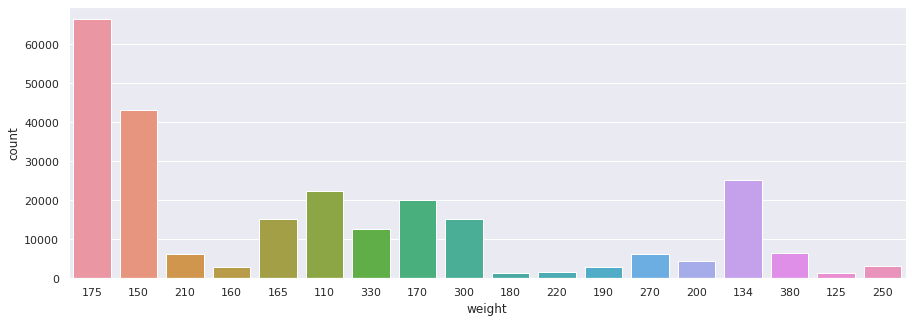

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(data1['weight'])
plt.show()

In [ ]:
data.to_csv('/content/drive/MyDrive/Tasks/QUANTIUM/cleaned_data.csv',index=False)